In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/samik/OneDrive/Masaüstü/3.sınıf/Machine Learning/linear_regression_dataset.csv",sep=";")


In [3]:
df

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000
5,4.0,6900
6,15.0,20000
7,7.0,8500
8,3.0,6000
9,2.0,3500


In [4]:
df.tail(5)

,deneyim,maas
9,2.0,3500
10,12.0,15000
11,10.0,13000
12,14.0,18000
13,6.0,7500


<function matplotlib.pyplot.show(close=None, block=None)>

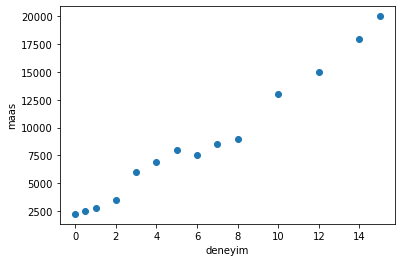

In [5]:
plt.scatter(df.deneyim,df.maas)
plt.xlabel("deneyim")
plt.ylabel("maas")
plt.show

In [6]:
a = df.deneyim.values
a

array([ 0.5,  0. ,  1. ,  5. ,  8. ,  4. , 15. ,  7. ,  3. ,  2. , 12. ,
       10. , 14. ,  6. ])

In [7]:
a.shape


(14,)

In [8]:
a = df.deneyim.values.reshape(-1,1)
b = df.maas.values.reshape(-1,1)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(a,b)

LinearRegression()

In [12]:
b0 = lr.predict([[0]])
b0

array([[1663.89519747]])

In [13]:
b1 = lr.intercept_
b1

array([1663.89519747])

In [14]:
b2 = lr.coef_
b2

array([[1138.34819698]])

In [15]:
yeni_maas = b0 + b2*11
print("11 yıllık kişinin maaşı : " , yeni_maas)

11 yıllık kişinin maaşı :  [[14185.72536421]]


In [16]:
b11= lr.predict([[11]])
b11

array([[14185.72536421]])

In [17]:
b6 = lr.predict([[6]])
b6

array([[8493.98437933]])

In [18]:
yeni_maas6 = b0 + b2*6
print("6 yıllık kişinin maaşı : " , yeni_maas6)

6 yıllık kişinin maaşı :  [[8493.98437933]]


In [20]:
y_head = lr.predict(a)

In [21]:
y_head

array([[ 2233.06929596],
       [ 1663.89519747],
       [ 2802.24339445],
       [ 7355.63618235],
       [10770.68077328],
       [ 6217.28798538],
       [18739.11815211],
       [ 9632.3325763 ],
       [ 5078.9397884 ],
       [ 3940.59159143],
       [15324.07356118],
       [13047.37716723],
       [17600.76995513],
       [ 8493.98437933]])

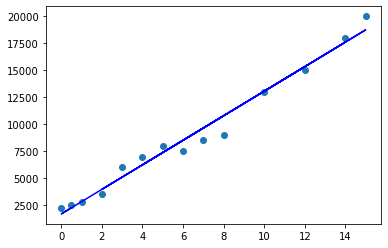

In [22]:
plt.plot(a,y_head,color="blue")
plt.scatter(a,b)
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(b,y_head)

685945.8459614947

In [24]:
print(b,y_head)

[[ 2500]
 [ 2250]
 [ 2750]
 [ 8000]
 [ 9000]
 [ 6900]
 [20000]
 [ 8500]
 [ 6000]
 [ 3500]
 [15000]
 [13000]
 [18000]
 [ 7500]] [[ 2233.06929596]
 [ 1663.89519747]
 [ 2802.24339445]
 [ 7355.63618235]
 [10770.68077328]
 [ 6217.28798538]
 [18739.11815211]
 [ 9632.3325763 ]
 [ 5078.9397884 ]
 [ 3940.59159143]
 [15324.07356118]
 [13047.37716723]
 [17600.76995513]
 [ 8493.98437933]]


In [25]:
MSE = np.square(np.subtract(b,y_head)).mean()


In [26]:
MSE

685945.8459614947

In [27]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [28]:
from sklearn.metrics import r2_score
print("r^2 square : " , r2_score(b,y_head))

r^2 square :  0.9775283164949902


# Multiple Linear Regression

In [29]:
#en az 2 bağımsız değişken 1 bağımlı değişken


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("C:/Users/samik/OneDrive/Masaüstü/3.sınıf/Machine Learning/Advertising.csv")

In [32]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [33]:
x = df[["TV","Radio","Newspaper"]]
y = df["Sales"]

In [34]:
x.shape

(200, 3)

In [35]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [37]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [38]:
#intercep = kesim noktası bağımlı değişkenlerin bağımsız değişkenlere eşit olmadığı yani bağımsız değişkenlerin değeri 0 olduğunda oluyor.
#coefficents = her bir bağımsız değişkenin bağımlı değişken üzerinde etkisini ölçer.

In [39]:
print("intercept", mlr.intercept_)

intercept 2.652789668879498


In [40]:
print("coefficents : " , list(zip(x,mlr.coef_)))


coefficents :  [('TV', 0.045425596023997955), ('Radio', 0.18975772766893617), ('Newspaper', 0.004603078953111991)]


In [41]:
mlr.coef_


array([0.0454256 , 0.18975773, 0.00460308])

In [42]:
y_pred = mlr.predict(x_test)
print("prediction",y_pred)

prediction [10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826292  9.75655721 20.82389762 17.20916742
 15.13816239 21.97290698 19.20181841 10.07501899 19.39017185 14.8673761
 14.36798893  7.55604543  9.96742165 14.76342565  7.20995576 13.60003295
  7.49088656 11.70865932 13.46091883 15.2229793  17.18088277 13.56738329
 14.30942267 13.72909849 11.88559349  8.77039705 12.1244102  19.20252289
  9.08376601  5.15367352 16.22852749 18.14111213 12.94835466 16.86274503
 17.86462435 12.33930625  4.3575739  11.25904494 16.11560622 13.56602169]


In [43]:
mlr_dif = pd.DataFrame({"gercek_deger": y_test, "tahmin edilen değer : " : y_pred})
mlr_dif

,gercek_deger,tahmin edilen değer :
126,6.6,10.621601
104,20.7,20.006253
99,17.2,16.918509
92,19.4,19.170407
111,21.8,20.949741
167,12.2,13.122843
116,12.2,11.807407
96,11.7,12.320198
52,22.6,20.578068
69,22.3,20.956627


In [44]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [45]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test,y_pred)
print("r sqr: {:.2f}".format(mlr.score(x,y)*100))
print("mse: " , mse)

r sqr: 89.59
mse:  1.850681994163694


In [46]:
 print(x,y)


        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [47]:
y_train


74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
       ... 
87     16.0
103    14.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [48]:
y_pred

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

In [49]:
x_train


,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3
...,...,...,...
87,110.7,40.6,63.2
103,187.9,17.2,17.9
67,139.3,14.5,10.2
24,62.3,12.6,18.3


In [50]:
from sklearn.metrics import r2_score
print("r^2 square : " , r2_score(y_test,y_pred))

r^2 square :  0.9058622107532247


In [51]:
print(y_test,y_pred)

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    12.2
116    12.2
96     11.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    15.6
125    10.6
196     9.7
194    17.3
177    11.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     15.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65      9.3
151    11.6
162    14.9
170     8.4
77     14.2
32      9.6
173    11.7
174    11.5
85     15.2
168    17.1
112    14.1
171    14.5
181    12.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    19.0
115    12.6
64     18.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64 [10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826

# Polynomial

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

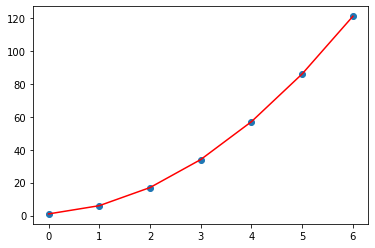

In [53]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([1, 6, 17, 34, 57, 86, 121])

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1,1))

model = LinearRegression()
model.fit(x_poly,y)

plt.scatter(x,y)
plt.plot(x,model.predict(x_poly),color="red")
plt.show()

In [54]:
y

array([  1,   6,  17,  34,  57,  86, 121])

In [55]:
y.shape

(7,)

In [56]:
x.shape

(7,)

In [57]:
x_poly

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

In [58]:
y

array([  1,   6,  17,  34,  57,  86, 121])

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [60]:
df = pd.read_csv("C:/Users/samik/OneDrive/Masaüstü/3.sınıf/Machine Learning/column_2C_weka.csv")

In [61]:
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [62]:
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [63]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [64]:
abnormaldata1= df[df["class"]=="Abnormal"]

In [65]:
x = np.array(abnormaldata1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y = np.array(abnormaldata1.loc[:,"sacral_slope"]).reshape(-1,1)

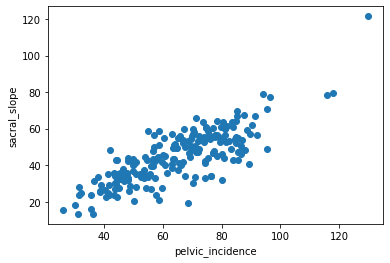

In [66]:
plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.427619799498007


In [68]:
poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.46077463950644426


In [69]:
X_new = np.linspace(0, 132, 200).reshape(200, 1)

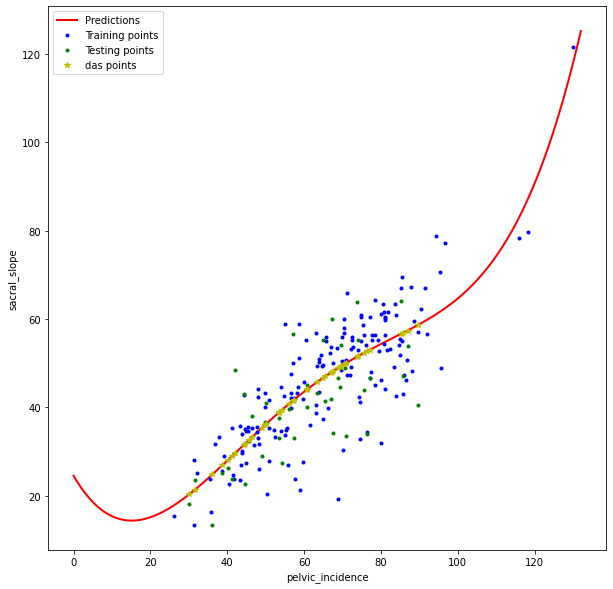

In [70]:
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.figure(figsize=[10,10])
plt.plot(X_new, y_new,"r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train,"b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.plot(x_test, y_pred, "y*",label='das points')
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.legend()
plt.show()

In [71]:
x.shape

(210, 1)

In [72]:
x_train.shape

(168, 1)

In [73]:
X_new.shape

(200, 1)

In [74]:
X_new

array([[  0.        ],
       [  0.66331658],
       [  1.32663317],
       [  1.98994975],
       [  2.65326633],
       [  3.31658291],
       [  3.9798995 ],
       [  4.64321608],
       [  5.30653266],
       [  5.96984925],
       [  6.63316583],
       [  7.29648241],
       [  7.95979899],
       [  8.62311558],
       [  9.28643216],
       [  9.94974874],
       [ 10.61306533],
       [ 11.27638191],
       [ 11.93969849],
       [ 12.60301508],
       [ 13.26633166],
       [ 13.92964824],
       [ 14.59296482],
       [ 15.25628141],
       [ 15.91959799],
       [ 16.58291457],
       [ 17.24623116],
       [ 17.90954774],
       [ 18.57286432],
       [ 19.2361809 ],
       [ 19.89949749],
       [ 20.56281407],
       [ 21.22613065],
       [ 21.88944724],
       [ 22.55276382],
       [ 23.2160804 ],
       [ 23.87939698],
       [ 24.54271357],
       [ 25.20603015],
       [ 25.86934673],
       [ 26.53266332],
       [ 27.1959799 ],
       [ 27.85929648],
       [ 28

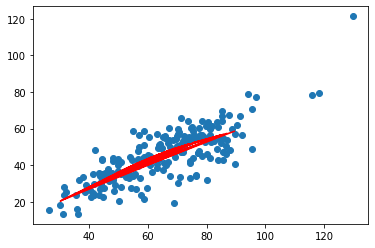

In [75]:
plt.scatter(x,y)
plt.plot(x_test, y_pred,label='das points',color="red")
plt.show()